# Classifying newswires: A multiclass classification example
Problem: To classify Reuters newswires into 46 mutually exclusive topics.
A single-label multiclass classification.

### The Reuters dataset
- Set of short newswires (electronic news) and their topics, published by Reuters in 1986.
- Widely used toy dataset for text classification.
- 46 different topics, each topic has at least 10 examples in the training set.

**Loading the Reuters dataset**

In [1]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)
# Argument `num_words` Restricts the data to the 10,000 most frequently occuring words found in the data

2022-07-24 15:34:12.026860: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-24 15:34:12.026909: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


You have
8,982 training examples and
2,246 test examples.

In [2]:
# Printing the length of the train_data
print(len(train_data))

8982


In [3]:
# Printing the length of the test_data
print(len(test_data))

2246


Just like with IMDB reviews dataset, each example is encoded as a list of integers (word indices):

In [4]:
# train_data example at index 10
print(train_data[10], end="")

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]

**Decoding the newswires back to text** <br>
To decode it back to words, in case curious.

In [5]:
# Creating a dictionary of words and their index.
word_index = reuters.get_word_index()

# Reversing the key and value of the dictionary.
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])

decoded_newswire = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])
# Note that the indices are offset by 3 because 0, 1, and 2 are reserved indices for
# "padding," "start of sequence," and "unknown."

In [6]:
# Printing the decoded newswire at index 0   ☝ --> train_data[0]
print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


The label associated with an example is an integer between 0 and 45 - a topic index:

In [7]:
print(train_labels[10])

3


### Preparing the data
<em>Vectorize the data.</em> <br>
**Encoding the input data (x)**

In [9]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    """Vectorizing the sequence of words."""
    
    # Creates an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            # Sets specific indices of results[i] to 1s
            results[i, j] = 1
    return results
    
# Vectorized training data
x_train = vectorize_sequences(train_data)

# Vectorized test data
x_test = vectorize_sequences(test_data)

**Encoding the labels (y)**
- To vectorize labels, there are two possibilities: cast the label list as an integer tensor or use <em>one-hot encoding</em>.
- One-hot encoding is a widely used format for categorical data, also called <em>categorical encoding</em>.
- In this case, one-hot encoding of the labels consists of embedding each label as an all-zero vector with a 1 in the place of a specific index. It's like "ignore the rest as zeros but make a specific label index as 1" for identification. 
- The following are two ways to do it:

In [ ]:
# The explicit or manual way by defining a function

# import numpy as np

# def to_one_hot(labels, dimension=46):
#    """
#    Converting the labels into one hot encoding.
#    """
#    results = np.zeros((len(labels), dimension))
#    for i, label in enumerate(labels):
#        results[i, label] = 1
#    return results


# Function calls
# Vectorized training labels
# y_train = to_one_hot(train_labels)

# Vectorized test labels
# y_test = to_one_hot(test_labels)

In [10]:
# The built-in way to do this in Keras:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building your model
📕💡 See page 108 for better understanding. <br>

**Model definition**

In [13]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**Compiling the model**

In [14]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach
Let's set apart 1,000 samples in the training data to use as a validation set.

**Setting aside a validation set**

In [15]:
#  Taking the first 1000 elements of the x_train (input data).
x_val = x_train[:1000]

# Taking all the elements of the x_train (input data) starting from the 1000th element.
partial_x_train = x_train[1000:]

#  Taking the first 1000 elements of the y_train (label data).
y_val = y_train[:1000]

# Taking all the elements of the y_train (label data) starting from the 1000th element.
partial_y_train = y_train[1000:]

Now, let's train the model for 20 epochs.

**Training the model**

In [16]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 43ms/step - loss: 2.5941 - accuracy: 0.5413 - val_loss: 1.6927 - val_accuracy: 0.6600
Epoch 2/20
16/16 [==============================] - 0s 31ms/step - loss: 1.3837 - accuracy: 0.7159 - val_loss: 1.3034 - val_accuracy: 0.7160
Epoch 3/20
16/16 [==============================] - 0s 25ms/step - loss: 1.0480 - accuracy: 0.7735 - val_loss: 1.1415 - val_accuracy: 0.7640
Epoch 4/20
16/16 [==============================] - 0s 27ms/step - loss: 0.8321 - accuracy: 0.8201 - val_loss: 1.0819 - val_accuracy: 0.7620
Epoch 5/20
16/16 [==============================] - 0s 26ms/step - loss: 0.6676 - accuracy: 0.8557 - val_loss: 1.0025 - val_accuracy: 0.7900
Epoch 6/20
16/16 [==============================] - 0s 25ms/step - loss: 0.5389 - accuracy: 0.8847 - val_loss: 0.9769 - val_accuracy: 0.7910
Epoch 7/20
16/16 [==============================] - 0s 24ms/step - loss: 0.4352 - accuracy: 0.9073 - val_loss: 0.9354 - val_accuracy: 0.8080
Epoch 8/20
16

And finally, let's display its loss and accuracy curves.

**Plotting the training and validation loss**

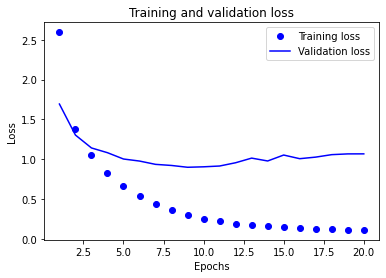

In [17]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

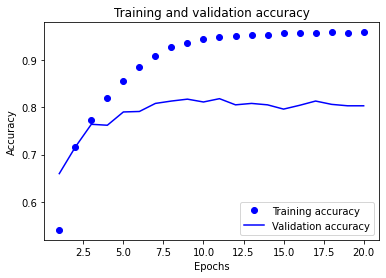

In [18]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

The model begins to overfit after nine epochs. Let's train a new model from scratch for nine epochs ans then evaluate it on the test set.

**Retraining a model from scratch**

In [19]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss = "categorical_crossentropy",
              metrics=["accuracy"])

model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/9


2022-07-24 15:35:39.223348: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 359280000 exceeds 10% of free system memory.


18/18 [==============================] - 1s 21ms/step - loss: 2.5838 - accuracy: 0.5177
Epoch 2/9
18/18 [==============================] - 0s 24ms/step - loss: 1.3571 - accuracy: 0.7159
Epoch 3/9
18/18 [==============================] - 0s 23ms/step - loss: 1.0059 - accuracy: 0.7852
Epoch 4/9
18/18 [==============================] - 1s 31ms/step - loss: 0.7882 - accuracy: 0.8367
Epoch 5/9
18/18 [==============================] - 0s 24ms/step - loss: 0.6278 - accuracy: 0.8709
Epoch 6/9
18/18 [==============================] - 0s 22ms/step - loss: 0.4979 - accuracy: 0.8937
Epoch 7/9
18/18 [==============================] - 0s 22ms/step - loss: 0.4011 - accuracy: 0.9177
Epoch 8/9
18/18 [==============================] - 0s 23ms/step - loss: 0.3300 - accuracy: 0.9296
Epoch 9/9
71/71 [==============================] - 0s 2ms/step - loss: 0.9949 - accuracy: 0.7867


In [20]:
print(results)
print(f"Test loss: {results[0]:.2%}")
print(f"Test accuracy: {results[1]:.2%}")

[0.9949263334274292, 0.7867319583892822]
Test loss: 99.49%
Test accuracy: 78.67%


This approach reaches an accuracy of ~79%. With a balanced binary classification problem, the accuracy reached by a purely random classifier is about 50%. But in this case, we have 46 classes, and they may not be equally repreented. What would be the accuracy of a random classifier? We could try quickly implementing one to check this by observing the code below.

In [21]:
# Shuffling the test labels and then comparing the shuffled labels to the original labels. 
# The mean of the hits array is the accuracy of the model.
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()


0.1803205699020481

In [22]:
print(f"{hits_array.mean():.0%}")

18%


As you can see, a random classifier would score around 18% classification accuracy, so the results of our model seem pretty good compared to the random classifier.

### Generating predictions on new data

In [23]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [24]:
predictions[0].shape

(46,)

In [25]:
np.sum(predictions[0])

1.0000001

In [26]:
np.argmax(predictions[0])

3

### A different way to handle the labels and the loss

In [ ]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### The importance of having sufficiently large intermediate layers
**A model with an information bottleneck (traffic or congestion in learning)**

In [27]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# We will use a validation set since this is a simulation of having a bottleneck, not our final model.
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 15ms/step - loss: 2.8198 - accuracy: 0.3814 - val_loss: 2.1434 - val_accuracy: 0.5820
Epoch 2/20
63/63 [==============================] - 1s 11ms/step - loss: 1.7147 - accuracy: 0.6232 - val_loss: 1.5511 - val_accuracy: 0.6300
Epoch 3/20
63/63 [==============================] - 1s 10ms/step - loss: 1.3102 - accuracy: 0.6570 - val_loss: 1.3933 - val_accuracy: 0.6800
Epoch 4/20
63/63 [==============================] - 1s 10ms/step - loss: 1.1341 - accuracy: 0.7350 - val_loss: 1.3362 - val_accuracy: 0.7080
Epoch 5/20
63/63 [==============================] - 1s 11ms/step - loss: 1.0067 - accuracy: 0.7642 - val_loss: 1.2864 - val_accuracy: 0.7190
Epoch 6/20
63/63 [==============================] - 1s 11ms/step - loss: 0.9085 - accuracy: 0.7813 - val_loss: 1.2673 - val_accuracy: 0.7180
Epoch 7/20
63/63 [==============================] - 1s 11ms/step - loss: 0.8303 - accuracy: 0.7949 - val_loss: 1.3027 - val_accuracy: 0.7150
Epoch 8/20
63

The model now peaks at ~71% validation accuracy, an 8% absolute drop. This drop is mostly due to the fact that we're trying to compress a lot of information (enough information to recover the separation hyperplanes of 46 classes) into an intermediate space that is too low-dimensional. The model is able to cram <em>most</em> of the necessary information into these four-dimensional representations, but not all of it.

### Further experiments

**Try using larger or smaller layers: 32 units, 128 units, and so on.**

**Using smaller layers of 32 units**

In [28]:
model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# We will use a validation set since this is a simulation of using 32 units, not our final model.
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 12ms/step - loss: 2.2024 - accuracy: 0.5494 - val_loss: 1.4933 - val_accuracy: 0.6500
Epoch 2/20
63/63 [==============================] - 1s 8ms/step - loss: 1.2459 - accuracy: 0.7191 - val_loss: 1.2015 - val_accuracy: 0.7080
Epoch 3/20
63/63 [==============================] - 0s 8ms/step - loss: 0.9279 - accuracy: 0.7989 - val_loss: 1.0438 - val_accuracy: 0.7790
Epoch 4/20
63/63 [==============================] - 0s 8ms/step - loss: 0.7194 - accuracy: 0.8438 - val_loss: 0.9870 - val_accuracy: 0.7790
Epoch 5/20
63/63 [==============================] - 1s 8ms/step - loss: 0.5654 - accuracy: 0.8770 - val_loss: 0.9366 - val_accuracy: 0.8020
Epoch 6/20
63/63 [==============================] - 0s 8ms/step - loss: 0.4469 - accuracy: 0.9040 - val_loss: 0.9472 - val_accuracy: 0.7930
Epoch 7/20
63/63 [==============================] - 0s 8ms/step - loss: 0.3565 - accuracy: 0.9222 - val_loss: 0.9323 - val_accuracy: 0.8020
Epoch 8/20
63/63 [=

The model now peaks at ~80% validation accuracy, a 1% increase.

**Using larger layers of 128 units**

In [29]:
model = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# We will use a validation set since this is a simulation of using 128 units, not our final model.
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 19ms/step - loss: 1.5737 - accuracy: 0.6661 - val_loss: 1.0876 - val_accuracy: 0.7690
Epoch 2/20
63/63 [==============================] - 1s 16ms/step - loss: 0.7665 - accuracy: 0.8360 - val_loss: 0.8971 - val_accuracy: 0.8220
Epoch 3/20
63/63 [==============================] - 1s 16ms/step - loss: 0.4574 - accuracy: 0.9024 - val_loss: 0.8375 - val_accuracy: 0.8140
Epoch 4/20
63/63 [==============================] - 1s 15ms/step - loss: 0.3014 - accuracy: 0.9334 - val_loss: 0.8792 - val_accuracy: 0.8120
Epoch 5/20
63/63 [==============================] - 1s 15ms/step - loss: 0.2269 - accuracy: 0.9451 - val_loss: 0.9490 - val_accuracy: 0.8070
Epoch 6/20
63/63 [==============================] - 1s 16ms/step - loss: 0.1825 - accuracy: 0.9513 - val_loss: 0.9358 - val_accuracy: 0.8140
Epoch 7/20
63/63 [==============================] - 1s 15ms/step - loss: 0.1756 - accuracy: 0.9524 - val_loss: 0.9639 - val_accuracy: 0.8170
Epoch 8/20
63

The model now peaks at 80% validation accuracy, but a much better increase.

**Now try using a single intermediate layer**

In [31]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# We will use a validation set since this is a simulation of using 
# one intermediate layer, not our final model.
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 14ms/step - loss: 1.7993 - accuracy: 0.6322 - val_loss: 1.1928 - val_accuracy: 0.7370
Epoch 2/20
63/63 [==============================] - 1s 11ms/step - loss: 0.9299 - accuracy: 0.8034 - val_loss: 0.9788 - val_accuracy: 0.7980
Epoch 3/20
63/63 [==============================] - 1s 11ms/step - loss: 0.6390 - accuracy: 0.8662 - val_loss: 0.8564 - val_accuracy: 0.8170
Epoch 4/20
63/63 [==============================] - 1s 10ms/step - loss: 0.4549 - accuracy: 0.9053 - val_loss: 0.8207 - val_accuracy: 0.8250
Epoch 5/20
63/63 [==============================] - 1s 11ms/step - loss: 0.3397 - accuracy: 0.9277 - val_loss: 0.8238 - val_accuracy: 0.8210
Epoch 6/20
63/63 [==============================] - 1s 11ms/step - loss: 0.2657 - accuracy: 0.9394 - val_loss: 0.8130 - val_accuracy: 0.8280
Epoch 7/20
63/63 [==============================] - 1s 10ms/step - loss: 0.2178 - accuracy: 0.9460 - val_loss: 0.8237 - val_accuracy: 0.8340
Epoch 8/20
63

The model still peaks at 80% validation accuracy.

Read **Wrapping Up** on page 113.